In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px

In [2]:
import rfpimp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("clean.csv")
df

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,Tito Ortiz,Evan Tanner,John McCarthy,2001-02-23,"Atlantic City, New Jersey, USA",Red,True,Light Heavyweight,5,0.0,...,2.0,1.0,1.0,5.0,Orthodox,190.50,187.96,205.0,30.0,26.0
3198,Chuck Liddell,Jeff Monson,Mario Yamasaki,2000-12-16,"Tokyo, Japan",Red,False,Middleweight,3,0.0,...,0.0,0.0,1.0,2.0,Orthodox,187.96,193.04,205.0,29.0,30.0
3199,Tito Ortiz,Wanderlei Silva,John McCarthy,2000-04-14,"Tokyo, Japan",Red,True,Light Heavyweight,5,0.0,...,2.0,0.0,1.0,3.0,Orthodox,190.50,187.96,205.0,23.0,25.0
3200,Jeremy Horn,Chuck Liddell,John McCarthy,1999-03-05,"Bay St. Louis, Mississippi, USA",Red,False,Middleweight,2,0.0,...,0.0,0.0,0.0,0.0,Orthodox,185.42,187.96,185.0,29.0,23.0


In [4]:
df = df.drop(labels = "R_fighter", axis = 1)
df = df.drop(labels = "B_fighter", axis = 1)
df = df.drop(labels = "Referee", axis = 1)
df = df.drop(labels = "location", axis = 1)
df = df.drop(labels = "date", axis = 1)

In [5]:
categorical_columns = ["Winner", "weight_class", "R_Stance", "B_Stance"]
for col in categorical_columns:
    df[col] = df[col].astype("category")

In [6]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,...,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,...,0,0,0,0,1,0,0,1,0,0
1,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,...,0,0,1,0,1,0,0,0,1,0
2,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,84.741935,...,0,0,0,0,1,0,0,1,0,0
3,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,109.500000,...,0,0,0,0,0,0,1,1,0,0
4,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,201.000000,...,0,0,0,0,0,1,0,0,1,0


In [7]:
df.shape

(3202, 156)

In [8]:
list(df.columns.values)

['title_bout',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_PASS',
 'B_avg_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_longest_win_streak',
 'B_losses',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_opp_CLINCH_att',
 'B_avg_opp_CLINCH_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_opp_GROUND_att',
 'B_avg_opp_GROUND_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_opp_KD',
 'B_avg_opp_LEG_att',
 'B_avg_opp_LEG_landed',
 'B_avg_opp_PASS',
 'B_avg_opp_REV',
 'B_avg_opp_

In [9]:
column_names = ['title_bout',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_PASS',
 'B_avg_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_longest_win_streak',
 'B_losses',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_opp_CLINCH_att',
 'B_avg_opp_CLINCH_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_opp_GROUND_att',
 'B_avg_opp_GROUND_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_opp_KD',
 'B_avg_opp_LEG_att',
 'B_avg_opp_LEG_landed',
 'B_avg_opp_PASS',
 'B_avg_opp_REV',
 'B_avg_opp_SIG_STR_att',
 'B_avg_opp_SIG_STR_landed',
 'B_avg_opp_SIG_STR_pct',
 'B_avg_opp_SUB_ATT',
 'B_avg_opp_TD_att',
 'B_avg_opp_TD_landed',
 'B_avg_opp_TD_pct',
 'B_avg_opp_TOTAL_STR_att',
 'B_avg_opp_TOTAL_STR_landed',
 'B_total_rounds_fought',
 'B_total_time_fought(seconds)',
 'B_total_title_bouts',
 'B_win_by_Decision_Majority',
 'B_win_by_Decision_Split',
 'B_win_by_Decision_Unanimous',
 'B_win_by_KO/TKO',
 'B_win_by_Submission',
 'B_win_by_TKO_Doctor_Stoppage',
 'B_wins',
 'B_Height_cms',
 'B_Reach_cms',
 'B_Weight_lbs',
 'R_current_lose_streak',
 'R_current_win_streak',
 'R_draw',
 'R_avg_BODY_att',
 'R_avg_BODY_landed',
 'R_avg_CLINCH_att',
 'R_avg_CLINCH_landed',
 'R_avg_DISTANCE_att',
 'R_avg_DISTANCE_landed',
 'R_avg_GROUND_att',
 'R_avg_GROUND_landed',
 'R_avg_HEAD_att',
 'R_avg_HEAD_landed',
 'R_avg_KD',
 'R_avg_LEG_att',
 'R_avg_LEG_landed',
 'R_avg_PASS',
 'R_avg_REV',
 'R_avg_SIG_STR_att',
 'R_avg_SIG_STR_landed',
 'R_avg_SIG_STR_pct',
 'R_avg_SUB_ATT',
 'R_avg_TD_att',
 'R_avg_TD_landed',
 'R_avg_TD_pct',
 'R_avg_TOTAL_STR_att',
 'R_avg_TOTAL_STR_landed',
 'R_longest_win_streak',
 'R_losses',
 'R_avg_opp_BODY_att',
 'R_avg_opp_BODY_landed',
 'R_avg_opp_CLINCH_att',
 'R_avg_opp_CLINCH_landed',
 'R_avg_opp_DISTANCE_att',
 'R_avg_opp_DISTANCE_landed',
 'R_avg_opp_GROUND_att',
 'R_avg_opp_GROUND_landed',
 'R_avg_opp_HEAD_att',
 'R_avg_opp_HEAD_landed',
 'R_avg_opp_KD',
 'R_avg_opp_LEG_att',
 'R_avg_opp_LEG_landed',
 'R_avg_opp_PASS',
 'R_avg_opp_REV',
 'R_avg_opp_SIG_STR_att',
 'R_avg_opp_SIG_STR_landed',
 'R_avg_opp_SIG_STR_pct',
 'R_avg_opp_SUB_ATT',
 'R_avg_opp_TD_att',
 'R_avg_opp_TD_landed',
 'R_avg_opp_TD_pct',
 'R_avg_opp_TOTAL_STR_att',
 'R_avg_opp_TOTAL_STR_landed',
 'R_total_rounds_fought',
 'R_total_time_fought(seconds)',
 'R_total_title_bouts',
 'R_win_by_Decision_Majority',
 'R_win_by_Decision_Split',
 'R_win_by_Decision_Unanimous',
 'R_win_by_KO/TKO',
 'R_win_by_Submission',
 'R_win_by_TKO_Doctor_Stoppage',
 'R_wins',
 'R_Height_cms',
 'R_Reach_cms',
 'R_Weight_lbs',
 'B_age',
 'R_age',
 'Winner_Draw',
 'weight_class_Catch Weight',
 'weight_class_Featherweight',
 'weight_class_Flyweight',
 'weight_class_Heavyweight',
 'weight_class_Light Heavyweight',
 'weight_class_Lightweight',
 'weight_class_Middleweight',
 'weight_class_Welterweight',
 "weight_class_Women's Bantamweight",
 "weight_class_Women's Featherweight",
 "weight_class_Women's Flyweight",
 "weight_class_Women's Strawweight",
 'B_Stance_Orthodox',
 'B_Stance_Southpaw',
 'B_Stance_Switch',
 'R_Stance_Orthodox',
 'R_Stance_Southpaw',
 'R_Stance_Switch',
"Winner_Red"]

In [10]:
df = df.reindex(columns=column_names)
df

,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,...,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,Winner_Red
0,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,...,0,0,0,1,0,0,1,0,0,1
1,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,...,0,1,0,1,0,0,0,1,0,1
2,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,84.741935,...,0,0,0,1,0,0,1,0,0,1
3,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,109.500000,...,0,0,0,0,0,1,1,0,0,0
4,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,201.000000,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,True,5,0.0,3.0,0.0,7.666667,6.666667,10.000000,7.000000,8.666667,...,0,0,0,1,0,0,1,0,0,1
3198,False,3,0.0,1.0,0.0,12.000000,10.000000,6.000000,3.000000,3.000000,...,0,0,0,1,0,0,1,0,0,1
3199,True,5,0.0,1.0,0.0,7.000000,6.500000,14.500000,12.000000,2.000000,...,0,0,0,1,0,0,1,0,0,1
3200,False,2,0.0,1.0,0.0,9.000000,6.000000,36.000000,21.000000,52.000000,...,0,0,0,1,0,0,1,0,0,1


In [11]:
X = df[df.columns[:-1]]
y = df["Winner_Red"]

In [12]:
model = DecisionTreeClassifier()

In [13]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

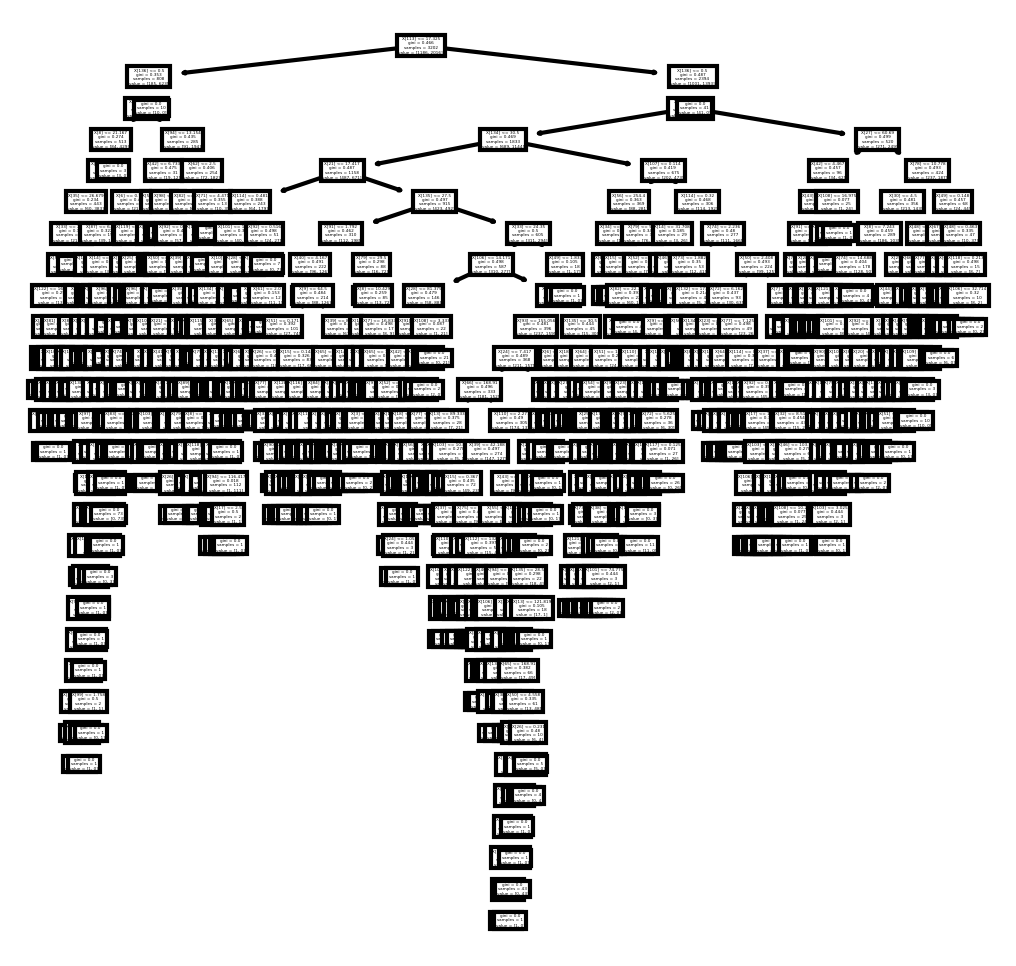

In [14]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model)
fig.savefig('tree.png')

In [15]:
model.score(X,y)

1.0

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
y_pred = model.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

0.5581835383159887

In [20]:
precision_score(y_test, y_pred)

0.659375

In [21]:
recall_score(y_test, y_pred)

0.6289120715350224

In [22]:
f1_score(y_test, y_pred)

0.6437833714721587

In [23]:
model=DecisionTreeClassifier()
scores = cross_validate(model, X, y, cv=10, scoring=('accuracy', 'average_precision', 'recall','f1'))

In [24]:
scores

{'fit_time': array([0.22754002, 0.23104119, 0.23604155, 0.22904062, 0.22804046,
        0.22904086, 0.24954367, 0.23604226, 0.24504304, 0.21353769]),
 'score_time': array([0.00600076, 0.00600028, 0.00550079, 0.00550079, 0.00500059,
        0.00550056, 0.00550127, 0.00550103, 0.00550079, 0.00550103]),
 'test_accuracy': array([0.53894081, 0.53894081, 0.590625  , 0.55      , 0.528125  ,
        0.553125  , 0.58125   , 0.596875  , 0.578125  , 0.60625   ]),
 'test_average_precision': array([0.64566213, 0.64389407, 0.66666791, 0.64525819, 0.63509834,
        0.64384441, 0.65565834, 0.6632245 , 0.64893322, 0.66058353]),
 'test_recall': array([0.55445545, 0.56435644, 0.64851485, 0.60891089, 0.58415842,
        0.62871287, 0.65671642, 0.67661692, 0.68159204, 0.72636816]),
 'test_f1': array([0.60215054, 0.60638298, 0.66666667, 0.63076923, 0.60981912,
        0.63979849, 0.66331658, 0.67830424, 0.66992665, 0.69856459])}

In [25]:
rfc = RandomForestClassifier()
rfc_scores = cross_validate(rfc, X, y.values.ravel(), cv=10, scoring=('accuracy', 'average_precision', 'recall','f1'))

In [26]:
rfc_scores

{'fit_time': array([1.17120433, 1.14520073, 1.13769937, 1.13970041, 1.14770103,
        1.14320064, 1.1612041 , 1.15820312, 1.15770292, 1.16170335]),
 'score_time': array([0.02300477, 0.02400422, 0.02350402, 0.02400422, 0.02350426,
        0.02350426, 0.02350378, 0.02300406, 0.02300453, 0.02350426]),
 'test_accuracy': array([0.63551402, 0.64797508, 0.665625  , 0.621875  , 0.6       ,
        0.640625  , 0.603125  , 0.66875   , 0.65625   , 0.65625   ]),
 'test_average_precision': array([0.72447266, 0.72210411, 0.75836121, 0.70632653, 0.6577959 ,
        0.69441653, 0.71120703, 0.83049908, 0.83601426, 0.77070227]),
 'test_recall': array([0.77722772, 0.77227723, 0.83663366, 0.81683168, 0.81188119,
        0.86633663, 0.80597015, 0.94029851, 0.9800995 , 0.98507463]),
 'test_f1': array([0.72853828, 0.73411765, 0.75955056, 0.73170732, 0.71929825,
        0.75268817, 0.71840355, 0.78099174, 0.78174603, 0.7826087 ])}

In [27]:
report = pd.DataFrame(index=list(rfc_scores.keys())[2:], columns=['Decision Tree', 'Random Forest'])
for key in report.index:
  report.loc[key] = [np.mean(scores[key]), np.mean(rfc_scores[key])]

report['Improvment'] = report['Random Forest'] - report['Decision Tree']
report *= 100
report = report.astype(float).round(1)

In [28]:
report

,Decision Tree,Random Forest,Improvment
test_accuracy,56.6,64.0,7.3
test_average_precision,65.1,74.1,9.0
test_recall,63.3,85.9,22.6
test_f1,64.7,74.9,10.2


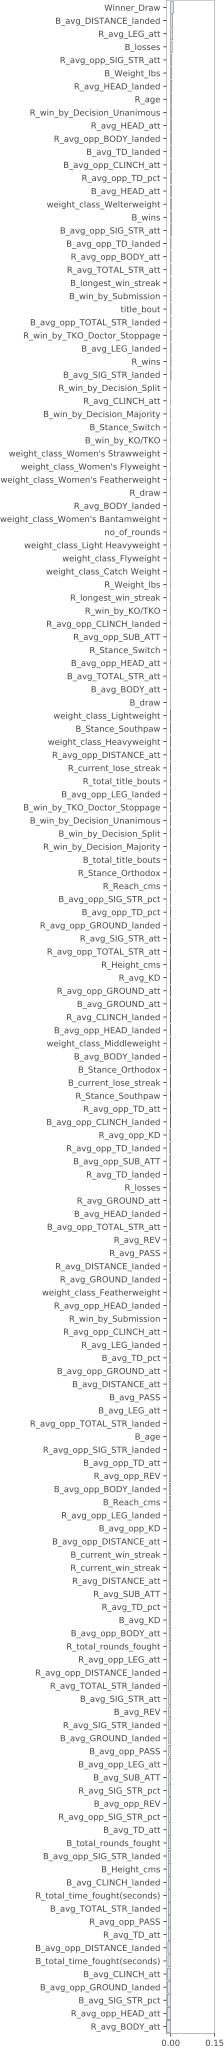

In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())
importance = rfpimp.importances(rfc, X_test, y_test)
rfpimp.plot_importances(importance)